In most of this school, we will be coding with the **Pytorch library**.

It is rather simple to use, and is centred around three main concepts:

* **Tensor** as a central data structure.
* **Auto-differenciation** for implementing the **computation of gradients** in a transparent way for the programmer. 
* Library of state-of-the-art **building blocks** to assemble neural networks. 

(All the following notebook is inspired from the Pytorch documentation)

# The tensor type

The **tensor** data structure is the central one in most DL libraries, and in particular in Pytorch.

Corresponds to the mathematical concept of **tensor** (generalization of matrices, in an arbitrary number of dimensions). 

In [129]:
import torch
import numpy as np

The same concept can be implemented:

* As a **Python multiple array**.
* As a **Numpy array**.
* As a Pytorch **tensor**.

In [130]:
python_array  = [[[1, 2], [3, 4]],[[5, 6], [7, 8]]]
numpy_array   = np.array(python_array)
torch_tensor  = torch.from_numpy(numpy_array)
print(python_array)
print(numpy_array)
print(torch_tensor)

[[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


There are **many ways to build/initialize a tensor**:

* from scratch,
* from a numpy array,
* as a zero/ones tensor of specified shape,
* as a zero/ones tensor with the characteristics (size) of another tensor,
* from a random number generator,
* ...

In [131]:
shape              = (2, 3, 2)
torch_tensor_zeros = torch.zeros(shape)
print("torch_tensor_zeros:\n {} \n".format(torch_tensor_zeros))
torch_tensor_ones  = torch.ones(shape)
print("torch_tensor_ones:\n {} \n".format(torch_tensor_ones))
torch_tensor_rand  = torch.rand(shape)
print("torch_tensor_rand:\n {} \n".format(torch_tensor_rand))


torch_tensor_zeros:
 tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]]) 

torch_tensor_ones:
 tensor([[[1., 1.],
         [1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.],
         [1., 1.]]]) 

torch_tensor_rand:
 tensor([[[0.4517, 0.8107],
         [0.5744, 0.0809],
         [0.5030, 0.7070]],

        [[0.2874, 0.5459],
         [0.9520, 0.6434],
         [0.5705, 0.4718]]]) 



In [132]:
torch_tensor_ones = torch.ones_like(torch_tensor)
print("torch_tensor_ones:\n {} \n".format(torch_tensor_ones))

torch_tensor_zeros = torch.rand_like(torch_tensor_ones, dtype=torch.float) 
print("torch_tensor_rand:\n {} \n".format(torch_tensor_rand))


torch_tensor_ones:
 tensor([[[1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1]]]) 

torch_tensor_rand:
 tensor([[[0.4517, 0.8107],
         [0.5744, 0.0809],
         [0.5030, 0.7070]],

        [[0.2874, 0.5459],
         [0.9520, 0.6434],
         [0.5705, 0.4718]]]) 



You can acess to the characteristics of a tensor such as:
    
* Its shape.
* The type of the data it contains.
* The device where it is held in memory (CPU/GPU).

In [133]:
print("Shape:    {}".format(torch_tensor_ones.shape))
print("Datatype: {}".format(torch_tensor_ones.dtype))
print("Device:   {}".format(torch_tensor_ones.device))

Shape:    torch.Size([2, 2, 2])
Datatype: torch.int64
Device:   cpu


The access to the data is similar to numpy:

* indices
* **range** of indices: begin:end:step.

In [134]:
torch_tensor_ones[:,1] = -1
print(torch_tensor_ones)

tensor([[[ 1,  1],
         [-1, -1]],

        [[ 1,  1],
         [-1, -1]]])


Two very useful operators:
    
* **concatenation** of tensors;
* **reshaping** of a given tensor.

In [135]:
print(torch_tensor_ones.shape,torch_tensor_rand.shape)
torch_tensor_concatenated = torch.cat([torch_tensor_ones, torch_tensor_rand], dim=1) # Try 1,2
print(torch_tensor_concatenated)

torch.Size([2, 2, 2]) torch.Size([2, 3, 2])
tensor([[[ 1.0000,  1.0000],
         [-1.0000, -1.0000],
         [ 0.4517,  0.8107],
         [ 0.5744,  0.0809],
         [ 0.5030,  0.7070]],

        [[ 1.0000,  1.0000],
         [-1.0000, -1.0000],
         [ 0.2874,  0.5459],
         [ 0.9520,  0.6434],
         [ 0.5705,  0.4718]]])


In [136]:
print(torch_tensor_concatenated.shape)
torch_tensor_concatenated=torch_tensor_concatenated.reshape((2,10))
print(torch_tensor_concatenated)
print(torch_tensor_concatenated.shape)


torch.Size([2, 5, 2])
tensor([[ 1.0000,  1.0000, -1.0000, -1.0000,  0.4517,  0.8107,  0.5744,  0.0809,
          0.5030,  0.7070],
        [ 1.0000,  1.0000, -1.0000, -1.0000,  0.2874,  0.5459,  0.9520,  0.6434,
          0.5705,  0.4718]])
torch.Size([2, 10])


In the implementations you will play with, you will perform mathematical operations on tensors. There are many of them!

In [137]:
# Element-wise operations
torch_tensor = torch.rand_like(torch_tensor_concatenated, dtype=torch.float) 

print(torch_tensor_concatenated*torch_tensor) 
print(torch_tensor_concatenated+torch_tensor)
print(torch_tensor_concatenated-torch_tensor)
print(torch_tensor_concatenated/torch_tensor)

# Matrix multiplication
print(torch_tensor.matmul(torch_tensor.T))
print(torch_tensor @ torch_tensor.T)

tensor([[ 0.5669,  0.5596, -0.8751, -0.1896,  0.4036,  0.1074,  0.0332,  0.0196,
          0.1935,  0.5518],
        [ 0.2896,  0.0284, -0.9698, -0.0731,  0.1756,  0.3717,  0.5526,  0.0995,
          0.2482,  0.2091]])
tensor([[ 1.5669,  1.5596, -0.1249, -0.8104,  1.3452,  0.9431,  0.6321,  0.3235,
          0.8877,  1.4874],
        [ 1.2896,  1.0284, -0.0302, -0.9269,  0.8983,  1.2268,  1.5325,  0.7980,
          1.0055,  0.9150]])
tensor([[ 0.4331,  0.4404, -1.8751, -1.1896, -0.4419,  0.6782,  0.5167, -0.1616,
          0.1183, -0.0735],
        [ 0.7104,  0.9716, -1.9698, -1.0731, -0.3234, -0.1350,  0.3716,  0.4888,
          0.1355,  0.0285]])
tensor([[  1.7641,   1.7870,  -1.1427,  -5.2750,   0.5055,   6.1189,   9.9521,
           0.3336,   1.3074,   0.9058],
        [  3.4525,  35.1671,  -1.0311, -13.6785,   0.4705,   0.8017,   1.6402,
           4.1609,   1.3115,   1.0644]])
tensor([[3.0715, 2.2630],
        [2.2630, 2.6140]])
tensor([[3.0715, 2.2630],
        [2.2630, 2.6140]]

Many functions apply some mathematical functions involving one or more dimensions in the tensors:
    
* mean
* max
* sum
* cumsum

For all of these, you need to specify the dimension(s) along which the operator applies.

In [138]:
print(torch_tensor_concatenated)
print(torch.mean(torch_tensor_concatenated)) # No axis applies the operation to all the elements
print(torch.mean(torch_tensor_concatenated,axis=0))

tensor([[ 1.0000,  1.0000, -1.0000, -1.0000,  0.4517,  0.8107,  0.5744,  0.0809,
          0.5030,  0.7070],
        [ 1.0000,  1.0000, -1.0000, -1.0000,  0.2874,  0.5459,  0.9520,  0.6434,
          0.5705,  0.4718]])
tensor(0.3299)
tensor([ 1.0000,  1.0000, -1.0000, -1.0000,  0.3695,  0.6783,  0.7632,  0.3622,
         0.5368,  0.5894])


**Exercise**:

* Generate a random $3\times 1000 \times 3$ tensor $\mathbf T$ with values distributed as a uniform distribution between -10 and 10. 
* Produce a $3 \times 3$ matrix $\mathbf M$ deduced from $\mathbf T$ by summing values along the second dimension.
* Compute $\mathbf M^3$. 

In [139]:
t = torch.rand((3, 1000, 3)) * 20 - 10
s = torch.sum(t, axis = 1)
c = torch.pow(s, 3)
print(s @ (s @ s))
print(c)

tensor([[-7.3009e+06,  4.4785e+07,  2.7499e+07],
        [ 2.3670e+07, -1.4920e+08, -8.5163e+07],
        [ 1.1902e+07, -8.5272e+07, -4.7488e+07]])
tensor([[-2.5057e+06,  2.9009e+05,  2.1016e+06],
        [ 5.4491e+05, -8.9868e+07, -8.7001e+06],
        [-8.7463e+03, -1.2245e+07, -7.1960e+06]])


# Auto grad

The main interest in using libraries such as Pytorch, Tensorflow, JAX is to have a transparent implementation of the **computation of the gradients** of the user-defined loss function. 

All of these propose a mechanism of **auto-differentiation** (auto-grad), to perform this task.

We recall that most supervised ML systems try to find a **parametrized funtion** $f_\theta$, parameterized by some parameters $\theta$,

$$
\mathbf y = f_\theta(\mathbf x),
$$

being given a number of examples (a.k.a. the training data) $\{\mathbf x_i,\mathbf y_i\}$.

To adjust our model, we need to define a loss function $\mathcal L()$ between the **expected output values** and our **model output values**:


$$
\theta^* = \arg\min_\theta \sum_i \mathcal L(\mathbf y_i,f_\theta(\mathbf x_i)).
$$


For example, in regression problems:

$$
\mathcal L(\mathbf y,f_\theta(\mathbf x))=\|\mathbf y-f_\theta(\mathbf x)\|^2.
$$


By using gradient descent:

$$
\theta' = \theta - \alpha\nabla_\theta \sum_i \mathcal L(\mathbf y_i,f_\theta(\mathbf x_i)).
$$

Auto-grad allows to compute this gradient.

In the DL jargon, this parameterized function is called a **model**.

We will see later how to **build** our models; first, you have to know that Pytorch has a number of **predefined models**.

In [140]:
import torch,torchvision
from torchvision.models import resnet18

# A famous model which is predefined in Pytorch
model= resnet18()

# Dummy data: Note that there are 10 data: these is called a "batch"
X      = torch.rand(10, 3, 64, 64) # This is a group of 10 random color images
Y_true = torch.rand(10, 1000)      # We generate random target values

In [141]:
# This is the forward pass:
Y_pred = model(X)
Y_pred.shape

torch.Size([10, 1000])

In [142]:
errors = (Y_pred - Y_true)**2 
print(errors.shape) # Note the size

# Sum all the squared differences
loss = errors.sum()

print(loss.shape, loss) # Note the size
loss.backward() # backpropagation is done here

torch.Size([10, 1000])
torch.Size([]) tensor(6173.3921, grad_fn=<SumBackward0>)


In [143]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9) # model.parameters() is like theta - Stochastic gradient descent
#lr is learning rate for deep learning; it's called step for machine learning
optim.step() # apply one step of gradient descent


# Setting up a neural network

You define your model as a class inheriting from nn.Module.

It needs:

* a constructor (__init__ method)
* a forward method, that implements the forwaard pass of your network.

Typically the constructor defines **instances** of the layers you will use in your network (convolutional, fully connected...).

Examples:
* nn.Linear
* nn.Conv2d

Then the **forward** method details how we apply these layers to our data.

Often it follows a functional form:

```
x = f1(x)
x = f2(x)
x = f3(x)
return x
```




In [144]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# A complete image classification example on CIFAR10

In [145]:
import torch
import torchvision
import torchvision.transforms as transforms

First step is to **prepare your data**.

There are a number of builtin functions:

* to load some very standard datasets (e.g., CIFAR10).
* to encapsulate them into a **"data loader"** that allows us to cycle over the data **batch after batch** (e.g. in training).

In [146]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

# Form the training dataset
trainset   = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

# Form the testing dataset
testset    = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us see what these images look like with matplotlib.

In [147]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Functions to show an image
def imshow(img):
    img = img*0.5 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

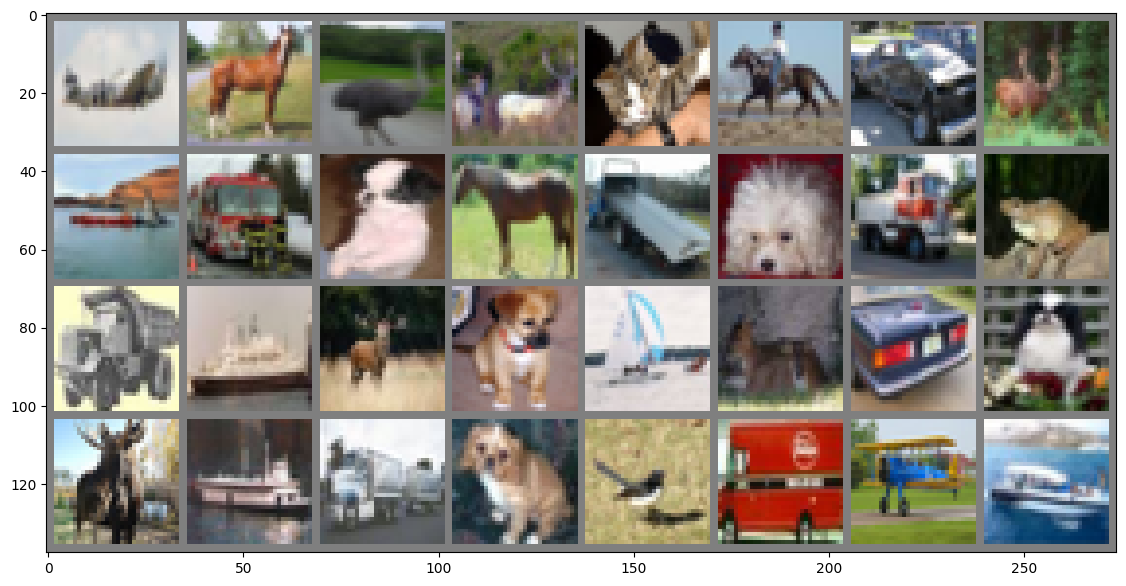

plane horse bird deer cat horse car deer ship truck dog horse truck dog truck frog truck ship deer dog ship deer car dog deer ship truck dog bird truck plane ship


In [148]:
# Take the first batch and show the images
dataiter       = iter(trainloader)
images, labels = next(dataiter)

# Show images
matplotlib.rcParams['figure.figsize'] = [14, 7]
imshow(torchvision.utils.make_grid(images,nrow = 8))

# Print their corresponding classes
print(' '.join('{}'.format(classes[labels[j]]) for j in range(batch_size)))


Now we will define a network to **perform classification**, i.e. attribute to each possible class (among the 10) a probablity.

* Its **input** is a batch of 3x32x32 images.
* Its **output** is a batch of 10x1 vectors.
* We use convolutional layers to extract features from the image, at different scales.

In [149]:
import torch.nn as nn
import torch.nn.functional as F


class imageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # produce a batch of  6 x 14 x 14 features
        x = self.pool(F.relu(self.conv2(x)))  # produce a batch of 16 x 5 x  5 features
        x = torch.flatten(x, 1)               # flatten to produce a batch of vectors
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

classifier = imageClassifier()

In [150]:
import torch.optim as optim

lossFunction = nn.CrossEntropyLoss()
optimizer    = optim.Adam(classifier.parameters(), lr=0.0015)

In [151]:
losses = []
# Each pass on this cycle will see all the batches from the training dataset
for epoch in range(10):
    running_loss = 0.0
    for i, batch in enumerate(trainloader, 0):
        # Get the inputs; data is a list of [inputs, labels]
        inputs, labels = batch

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass for the whole batch
        outputs = classifier(inputs)
        
        # Evaluate the loss 
        loss = lossFunction(outputs, labels)
        
        # Apply backpropagation: compute the gradient of the loss
        loss.backward()
        
        # Apply a gradient descent step: parameters = parameters - alpha * gradient
        optimizer.step()

        # Dislay loss values
        running_loss += loss.item()
        if i % 1000 ==  999:    # print every 1000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1000:.3f}')
            losses.append([epoch,running_loss / 1000.0])
            running_loss = 0.0


[1,  1000] loss: 1.670
[2,  1000] loss: 1.282
[3,  1000] loss: 1.147
[4,  1000] loss: 1.051
[5,  1000] loss: 0.986
[6,  1000] loss: 0.934
[7,  1000] loss: 0.899
[8,  1000] loss: 0.855
[9,  1000] loss: 0.839
[10,  1000] loss: 0.806


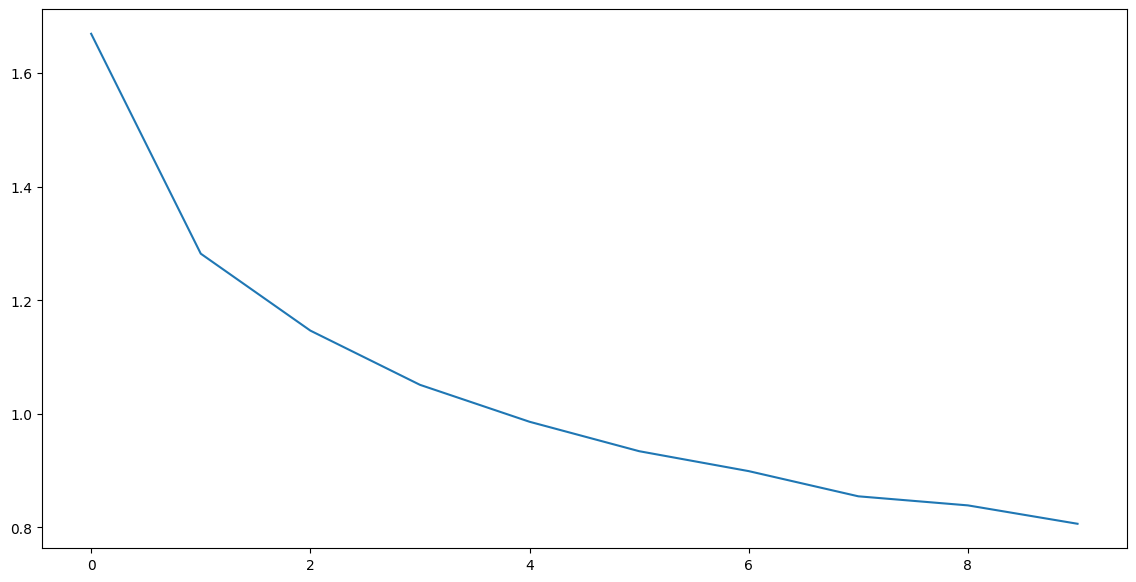

In [152]:
losses = np.array(losses)
plt.plot(losses[:,0],losses[:,1])

In [153]:
PATH = './classifier.pth'
torch.save(classifier.state_dict(), PATH)

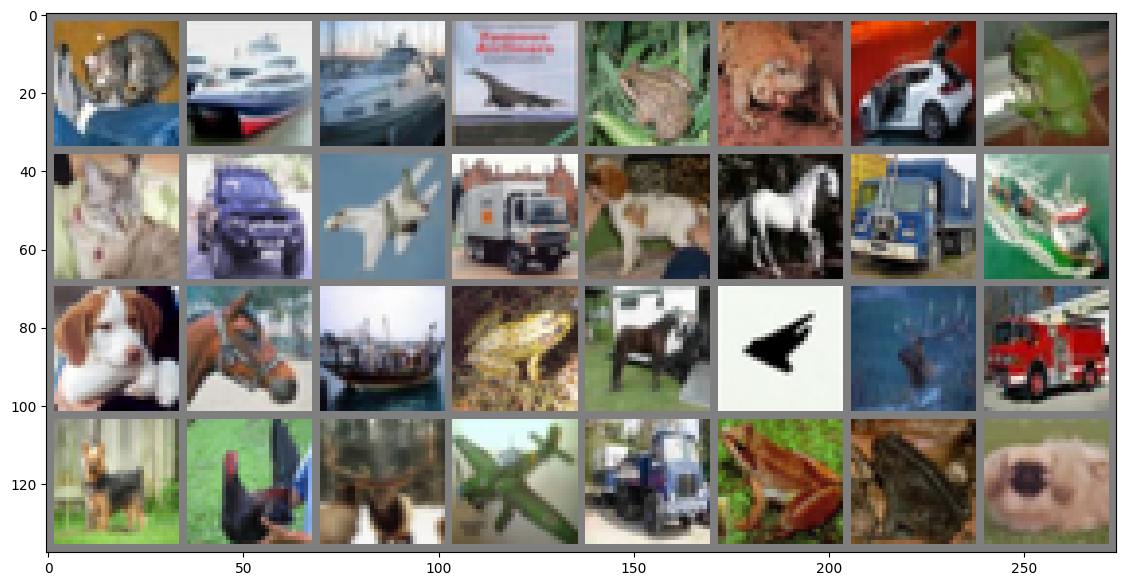

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog  cat   car   plane truck dog   horse truck ship  dog   horse ship  frog  horse plane deer  truck dog   bird  deer  plane truck frog  frog  dog  
Predicted:    cat   car   ship  car   frog  deer  car   frog  bird  car   deer  truck dog   horse truck ship  dog   cat   ship  frog  truck plane bird  truck bird  dog   deer  plane truck frog  frog  bird 


In [154]:
batch          = iter(testloader)
images, labels = next(batch)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
_, predicted = torch.max(classifier(images), 1)
print('Predicted:   ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

In [155]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for batch in testloader:
        images, labels = batch
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(classifier(images).data, 1)
        total   += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')


Accuracy of the network on the test images: 64 %


**Exercise**:

Recast the previous example as a dog vs. non dog classification problem.    

Use 

https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html

# CPU/GPU

You can check what devices your system has:

In [156]:
# Access to CUDA
device    = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


To use CUDA:

* Use the **to** method to move the data/the model to the GPU
* Use the same method to get it back to CPU.